In [305]:
# Importing needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [306]:
# Importing excel file containing song variables into pandas dataframe 

song_ranks = pd.read_csv('song data.csv')

In [307]:
song_ranks.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,9/25/1928,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [190]:
# Looking into # of rows of data & # of attributes within dataset

song_ranks.shape

(169909, 19)

In [191]:
# Dropping unneeded columns

song_ranks = song_ranks.drop(['id', 'key', 'mode', 'release_date'], axis=1)

In [192]:
# Limiting dataset to consider only songs after 1990

song_ranks = song_ranks[song_ranks.year >= 1990]

In [193]:
# Checking datatypes of attributes 

song_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61656 entries, 5054 to 169908
Data columns (total 15 columns):
acousticness        61656 non-null float64
artists             61656 non-null object
danceability        61656 non-null float64
duration_ms         61656 non-null int64
energy              61656 non-null float64
explicit            61656 non-null int64
instrumentalness    61656 non-null float64
liveness            61656 non-null float64
loudness            61656 non-null float64
name                61656 non-null object
popularity          61656 non-null int64
speechiness         61656 non-null float64
tempo               61656 non-null float64
valence             61656 non-null float64
year                61656 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 7.5+ MB


In [194]:
# Seeing summary statistics of numeric attributes

song_ranks.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
count,61656.000000,61656.000000,6.165600e+04,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000,61656.000000
mean,0.268365,0.584913,2.370002e+05,0.628157,0.191109,0.082289,0.194250,-8.172979,51.200954,0.091963,120.513367,0.514125,2004.923917
std,0.297587,0.175778,9.085838e+04,0.232795,0.393178,0.229866,0.164892,4.720933,11.694571,0.102741,30.909525,0.254526,8.909471
min,0.000000,0.000000,3.008000e+04,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
25%,0.020900,0.471000,1.926800e+05,0.478000,0.000000,0.000000,0.094500,-9.775000,43.000000,0.034600,95.919000,0.312000,1997.000000
50%,0.139000,0.597000,2.266930e+05,0.658000,0.000000,0.000008,0.127000,-7.056000,50.000000,0.048100,118.097000,0.514000,2005.000000
75%,0.454000,0.714000,2.672670e+05,0.814000,0.000000,0.002400,0.248000,-5.177000,59.000000,0.097200,140.281500,0.719250,2013.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,1.000000,1.000000,1.342000,100.000000,0.955000,244.091000,1.000000,2020.000000


In [195]:
# Converting scale of song duration attribute from milliseconds to minutes

song_ranks['duration'] = song_ranks['duration_ms']/1000/60

In [196]:
song_ranks = song_ranks.drop(['duration_ms'], axis=1)

In [198]:
# Seeing which songs have a duration of longer than 10 minutes

song_ranks[song_ranks.duration >= 10].head(5)

,acousticness,artists,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year,duration
5128,0.96500,"['Wolfgang Amadeus Mozart', 'Takako Nishizaki'...",0.213,0.142,0,0.4220,0.121,-16.835,"Serenade No. 7 in D Major, K. 250, ""Haffner"": ...",38,0.0406,92.282,0.0625,1990,10.833333
5262,0.62800,['Neil Young'],0.492,0.374,0,0.0705,0.259,-12.969,Natural Beauty,41,0.0270,117.191,0.2310,1992,10.387783
5491,0.00439,['Prince'],0.750,0.843,1,0.0122,0.373,-5.870,Come,40,0.0798,91.378,0.6960,1994,11.219333
5706,0.45000,['Opeth'],0.387,0.314,0,0.4450,0.150,-11.956,To Bid You Farewell,50,0.0298,75.148,0.1930,1996,10.906883
5772,0.05900,['Modest Mouse'],0.647,0.710,0,0.2660,0.119,-7.770,Truckers Atlas,38,0.0407,100.664,0.6830,1997,10.958883


In [199]:
# Limiting dataset to songs with duration of less than or equal to 10 minutes

song_ranks = song_ranks[song_ranks.duration <= 10]

In [299]:
song_ranks.describe()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
count,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000,61436.000000
mean,0.267833,0.585701,0.628714,0.191370,0.081303,0.194035,-8.150919,51.224901,0.091956,120.553899,0.514927,3.907284
std,0.297162,0.175213,0.232279,0.393383,0.228653,0.164424,4.689460,11.696776,0.102632,30.908498,0.254170,1.144783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.501333
25%,0.020900,0.472750,0.478750,0.000000,0.000000,0.094475,-9.755250,43.000000,0.034600,95.941000,0.313000,3.208988
50%,0.139000,0.598000,0.658000,0.000000,0.000008,0.127000,-7.047000,50.000000,0.048100,118.196500,0.515000,3.774000
75%,0.453000,0.715000,0.815000,0.000000,0.002300,0.248000,-5.171000,59.000000,0.097300,140.341500,0.720000,4.444450
max,0.996000,0.986000,1.000000,1.000000,1.000000,1.000000,1.342000,100.000000,0.955000,244.091000,1.000000,10.000000


In [200]:
# Seeing which titles of songs occur the most frequently 

song_ranks.name.value_counts().head(20)

Home           33
You            26
Runaway        23
Stay           23
Forever        22
Beautiful      21
Wake Up        20
Alone          20
Angel          19
Believe        19
Heaven         19
Hold On        19
Smile          18
Intro          18
Breathe        18
Paradise       17
Without You    17
Summertime     16
Monster        14
Hello          14
Name: name, dtype: int64

In [201]:
# Seeing which words occur the most frequently in song titles 

popular_words = pd.Series(' '.join(song_ranks['name']).lower().split()).value_counts()

In [202]:
popular_words.head(10)

the       6886
-         5749
you       3407
(feat.    3096
me        2728
i         2696
a         2675
of        2314
in        2232
to        1917
dtype: int64

In [203]:
# Seeing which artists have the most songs within dataset

song_ranks.artists.value_counts().head(20)

['Taylor Swift']             189
['Eminem']                   181
['Red Hot Chili Peppers']    158
['Nirvana']                  143
['Green Day']                139
['George Strait']            132
['Drake']                    128
['Sublime']                  123
['BTS']                      117
['blink-182']                111
['Metallica']                108
['John Mayer']               105
['2Pac']                     102
['Mac Miller']               102
['Los Tigres Del Norte']     100
['Radiohead']                100
['Kenny Chesney']             99
['Joan Sebastian']            98
['One Direction']             97
['Lana Del Rey']              95
Name: artists, dtype: int64

In [204]:
# Seeing range of # of songs inlcuded per year within dataset

song_ranks.groupby('year').count()

,acousticness,artists,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,,,,
1990,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978,1978
1991,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994
1992,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993
1993,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981
1994,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987,1987
1995,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984
1996,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994
1997,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992
1998,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [205]:
# Number of songs with popularity score over 50 

pop_over_50 = song_ranks[song_ranks['popularity'] > 50]
pop_over_50.count()

acousticness        30251
artists             30251
danceability        30251
energy              30251
explicit            30251
instrumentalness    30251
liveness            30251
loudness            30251
name                30251
popularity          30251
speechiness         30251
tempo               30251
valence             30251
year                30251
duration            30251
dtype: int64

In [206]:
# Number of songs with popularity score over 75

pop_over_50 = song_ranks[song_ranks['popularity'] >= 75]
pop_over_50.count()

acousticness        1662
artists             1662
danceability        1662
energy              1662
explicit            1662
instrumentalness    1662
liveness            1662
loudness            1662
name                1662
popularity          1662
speechiness         1662
tempo               1662
valence             1662
year                1662
duration            1662
dtype: int64

In [207]:
# Finding 95% confidence interval for mean popularity using bootstrapping

np.random.seed(77)
num_replicates = 10000

def bootstrap_replicate(data,func):
    bootstrap_sample = np.random.choice(data,size=len(data))
    return func(bootstrap_sample)

popularity_replicates = np.empty(num_replicates)

for i in range(num_replicates):
    popularity_replicates[i] = bootstrap_replicate(song_ranks['popularity'],np.mean)

popularity_confidence_interval = np.percentile(popularity_replicates,[2.5,97.5])
popularity_confidence_interval

array([51.12997265, 51.31854572])

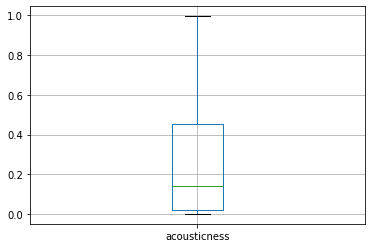

In [208]:
# Looking into distributions of numeric variables using boxplots

song_ranks.boxplot(column='acousticness')

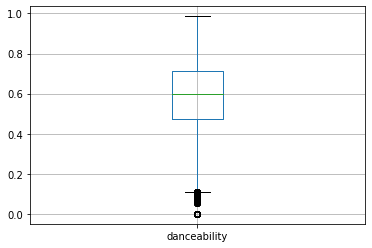

In [209]:
song_ranks.boxplot(column='danceability')

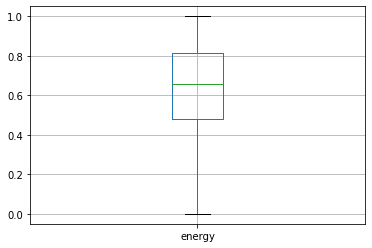

In [210]:
song_ranks.boxplot(column='energy')

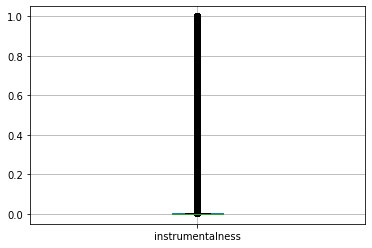

In [211]:
song_ranks.boxplot(column='instrumentalness')

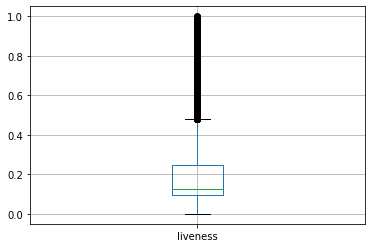

In [212]:
song_ranks.boxplot(column='liveness')

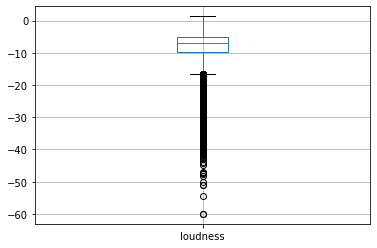

In [213]:
song_ranks.boxplot(column='loudness')

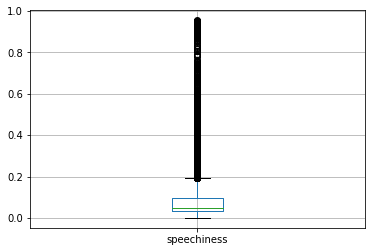

In [214]:
song_ranks.boxplot(column='speechiness')

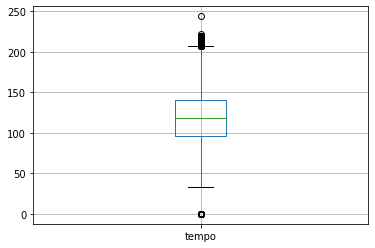

In [215]:
song_ranks.boxplot(column='tempo')

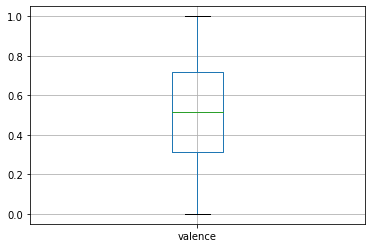

In [216]:
song_ranks.boxplot(column='valence')

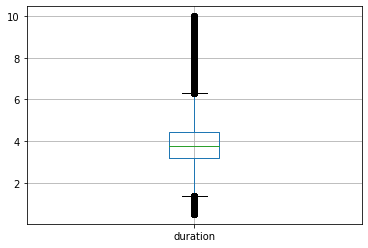

In [217]:
song_ranks.boxplot(column='duration')

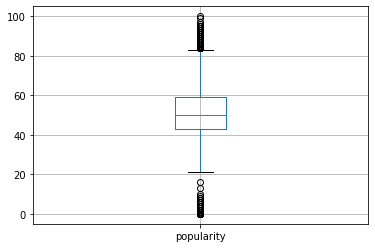

In [218]:
song_ranks.boxplot(column='popularity')

In [219]:
# Seeing how each numeric attribute correlates to the popularity of a song through scatterplots
# Plotting histograms of attributes to see the frequncies of each numeric attribute in songs within dataset

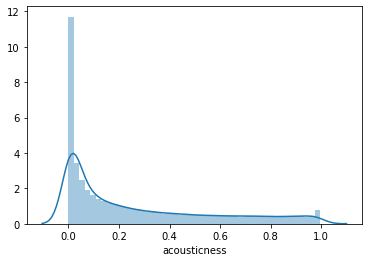

In [220]:
# Distribution of acousticness is very right skeweed with 0 acousticness being the most common

sns.distplot(song_ranks['acousticness'])

Text(0.5, 1.0, 'acousticness vs popularity')

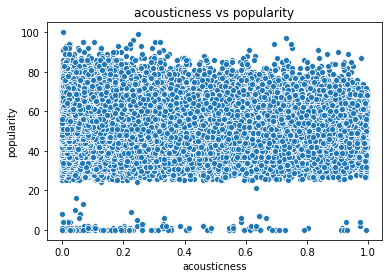

In [221]:
# No correlation seen between acousticness & popularity 

sns.scatterplot(x=song_ranks['acousticness'], y=song_ranks['popularity'])
plt.title('acousticness vs popularity')

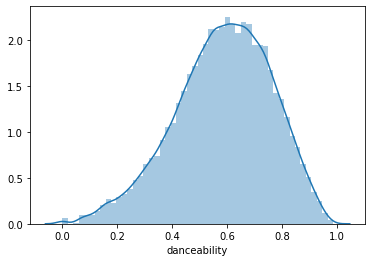

In [222]:
# Distribution of danceability is slightly left skwewed with danceability value around 0.6 being the most common

sns.distplot(song_ranks['danceability'])

Text(0.5, 1.0, 'danceability vs popularity')

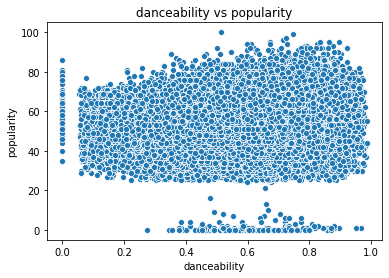

In [223]:
# No correlation seen between danceability & popularity 

sns.scatterplot(x=song_ranks['danceability'], y=song_ranks['popularity'])
plt.title('danceability vs popularity')

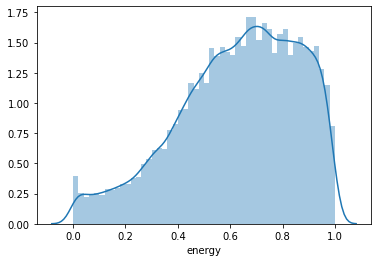

In [224]:
# Distribution of energy is left skewed with energy value close to 0.7 being the most common

sns.distplot(song_ranks['energy'])

Text(0.5, 1.0, 'energy vs popularity')

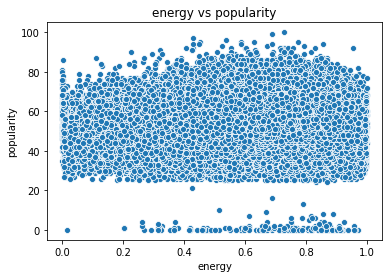

In [225]:
# No correlation seen between energy & popularity 

sns.scatterplot(x=song_ranks['energy'], y=song_ranks['popularity'])
plt.title('energy vs popularity')

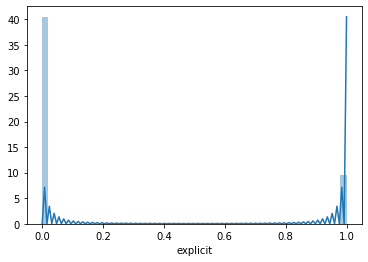

In [226]:
# Seemes to be relatively equal # of explicit & non-explicit songs within dataset

sns.distplot(song_ranks['explicit'])

Text(0.5, 1.0, 'explicit vs popularity')

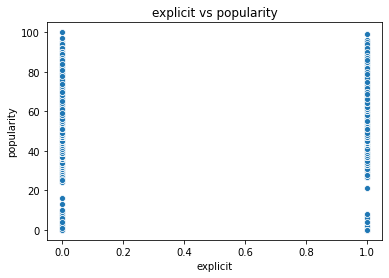

In [227]:
# No correlation between explicit songs & popularity 

sns.scatterplot(x=song_ranks['explicit'], y=song_ranks['popularity'])
plt.title('explicit vs popularity')

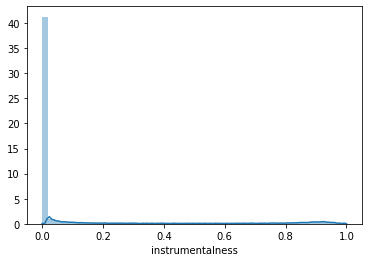

In [228]:
# Distribution of instrumentalness is very right skewed with instrumentalness of 0 occuring the most frequently 

sns.distplot(song_ranks['instrumentalness'])

Text(0.5, 1.0, 'instrumentalness vs popularity')

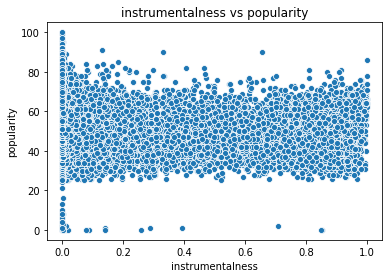

In [229]:
# No correlation seen between instrumentalness & popularity 

sns.scatterplot(x=song_ranks['instrumentalness'], y=song_ranks['popularity'])
plt.title('instrumentalness vs popularity')

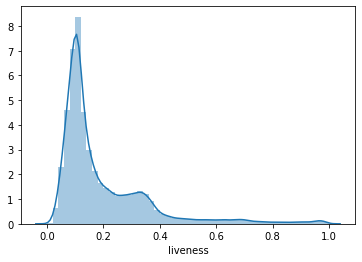

In [230]:
# Distribution of liveness is right skewed with a livenss value around 0.1 occuring the most frequently 

sns.distplot(song_ranks['liveness'])

Text(0.5, 1.0, 'liveness vs popularity')

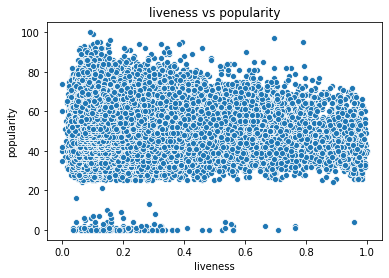

In [231]:
# No correlation seen between liveness & popularity

sns.scatterplot(x=song_ranks['liveness'], y=song_ranks['popularity'])
plt.title('liveness vs popularity')

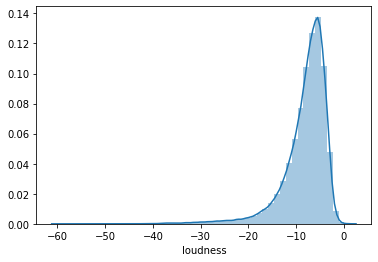

In [232]:
# Distribution of loudness is very left skewed with a loudness value close to -5 being the most common

sns.distplot(song_ranks['loudness'])

Text(0.5, 1.0, 'loudness vs popularity')

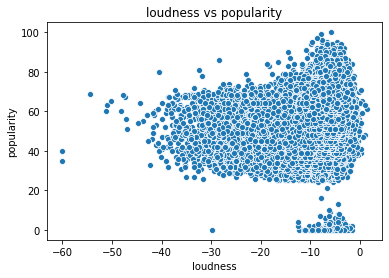

In [233]:
# No correlation seen between loudnes & popularity 

sns.scatterplot(x=song_ranks['loudness'], y=song_ranks['popularity'])
plt.title('loudness vs popularity')

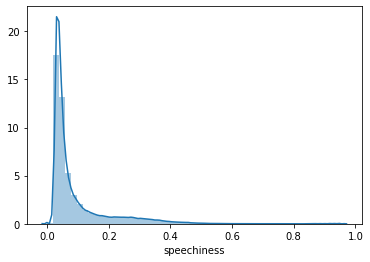

In [234]:
# Distribution of speechiness is very right skewed with a speechiness value between 0 & 0.1 occuring the most frequently 

sns.distplot(song_ranks['speechiness'])

Text(0.5, 1.0, 'speechiness vs popularity')

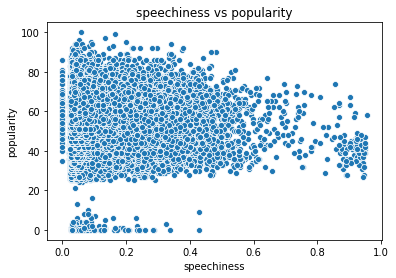

In [235]:
# No significant correlation between speechiness & popularity 

sns.scatterplot(x=song_ranks['speechiness'], y=song_ranks['popularity'])
plt.title('speechiness vs popularity')

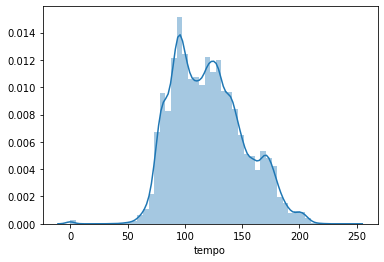

In [236]:
# Distribution of tempo is semi-normal with a tempo value close to 100 occuring the most occurently 

sns.distplot(song_ranks['tempo'])

Text(0.5, 1.0, 'tempo vs popularity')

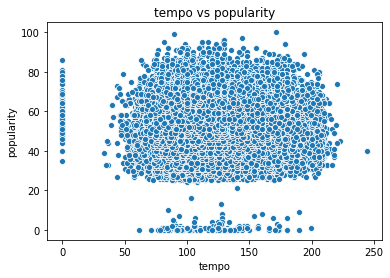

In [237]:
# No correlation seen between tempo & popularity 

sns.scatterplot(x=song_ranks['tempo'], y=song_ranks['popularity'])
plt.title('tempo vs popularity')

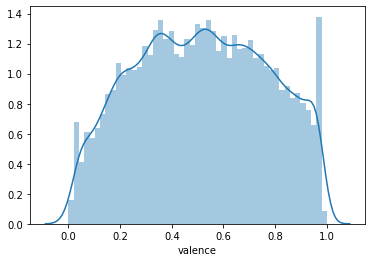

In [238]:
# Distribution of valence is semi-uniform with many values being the most common

sns.distplot(song_ranks['valence'])

Text(0.5, 1.0, 'valence vs popularity')

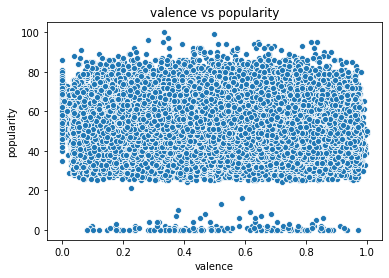

In [239]:
# No correlation seen between valence & popularity 

sns.scatterplot(x=song_ranks['valence'], y=song_ranks['popularity'])
plt.title('valence vs popularity')

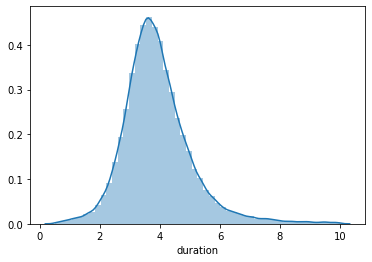

In [240]:
# Duration has a slight right skewed distribution with a duration of 4 minutes being the most common

sns.distplot(song_ranks['duration'])

Text(0.5, 1.0, 'duration vs popularity')

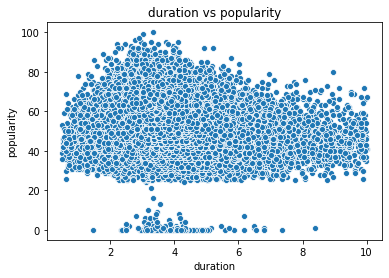

In [241]:
# No significant correlation seen between duration & popularity 

sns.scatterplot(x=song_ranks['duration'], y=song_ranks['popularity'])
plt.title('duration vs popularity')

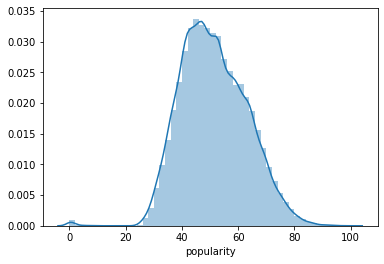

In [242]:
# Popularity has a close to normal distribution with a distribution around 50 being the most common 

sns.distplot(song_ranks['popularity'])

In [243]:
# Average popularity scores have increased between 1990-2020
# Since I want to be able to predict the popularity of future songs, I will not use year as a predictor variable

song_ranks.groupby('year')['popularity'].mean()

year
1990    39.831143
1991    41.224173
1992    42.487205
1993    42.363453
1994    44.391545
1995    44.476310
1996    44.390672
1997    45.198795
1998    45.254135
1999    46.841549
2000    46.320603
2001    48.635542
2002    48.205411
2003    48.420603
2004    48.996486
2005    50.360261
2006    50.633267
2007    50.720662
2008    50.525789
2009    51.357393
2010    52.773206
2011    53.189162
2012    54.350754
2013    55.690918
2014    56.969454
2015    59.550311
2016    61.371254
2017    64.861500
2018    67.276000
2019    69.664830
2020    63.111048
Name: popularity, dtype: float64

In [244]:
song_ranks = song_ranks.drop(['year'], axis=1)

In [245]:
# Seeing number of rows & columns in dataset after wrangling

song_ranks.shape

(61436, 14)

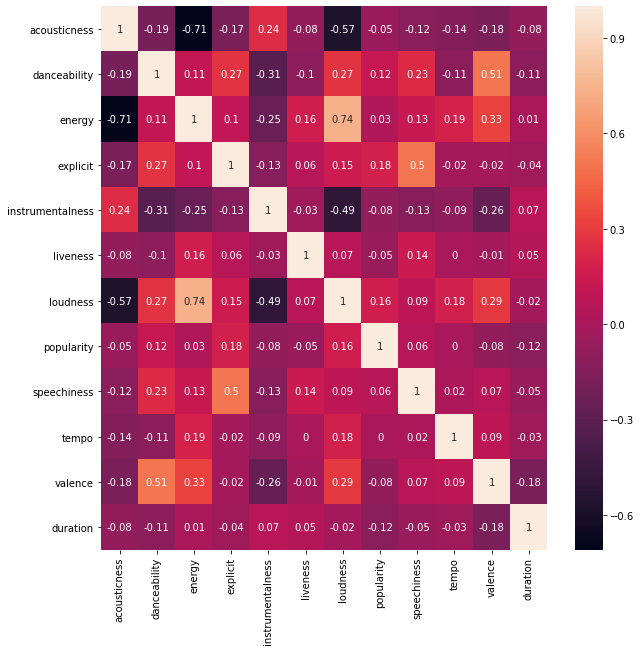

In [246]:
# Correlation matrix to show strengh of correlation between all predictor variables & between predictor variables & popularity
# Only strong correlation seen in matrix are between energy & loudness & energy & acousticness
# No predictor variables have significant correlations with popularity as seen in above scatterplots too

plt.figure(figsize = (10,10))
correlation_matrix = song_ranks.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [247]:
# Importing packages for regression models 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [248]:
# Creating X dataframe with all numeric attributes & Y dataframe containing the dependent variable 'popularity'

X_numeric = song_ranks.drop(['popularity', 'artists', 'name'], axis=1)
Y_numeric = song_ranks.popularity

In [67]:
# Creating training & testing sets with numeric attributes for regression

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=6)

In [68]:
# Standard linear regression to see how numerical attributes do in explaining popularity
# R^2 score of 10.81% on training set

reg_numeric = LinearRegression(normalize=True)
reg_numeric.fit(X_train, Y_train)
reg_numeric.score(X_train, Y_train)

0.10805824204407553

In [69]:
# Linear regression RMSE on training set

Y_pred = reg_numeric.predict(X_train)
reg_numeric_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
reg_numeric_rmse

11.048571256674672

In [70]:
# Linear regression has R^2 score of 10.76% on testing set, similar to training set R^2 score 

reg_numeric.score(X_test, Y_test)

0.10758248206618792

In [71]:
# Linear regression RMSE on test set

Y_pred = reg_numeric.predict(X_test)
reg_numeric_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_numeric_rmse

11.04448641675901

In [72]:
# Coefficients of numeric variables in linear regression
# Valence & danceability have highest magnitude coefficient values 

linear_coeff = pd.DataFrame()
linear_coeff['Columns'] = X_train.columns
linear_coeff['Coefficient Estimates'] = pd.Series(reg_numeric.coef_)
linear_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
9,valence,-9.481505
2,energy,-4.517061
7,speechiness,-4.362149
5,liveness,-2.647102
10,duration,-1.312099
8,tempo,0.004756
6,loudness,0.651884
0,acousticness,1.147193
4,instrumentalness,1.799557
3,explicit,3.898379


In [73]:
# Lasso regression 
# R^2 scores & RMSE values are similar to above linear regression 

lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
lasso_regressor.score(X_train, Y_train)

0.10805824204341628

In [75]:
Y_pred = lasso_regressor.predict(X_train)
reg_lasso_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
reg_lasso_rmse

11.048571256678754

In [76]:
lasso_regressor.score(X_test, Y_test)

0.1075824911349077

In [77]:
Y_pred = lasso_regressor.predict(X_test)
reg_lasso_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_lasso_rmse

11.044486360642143

In [78]:
lasso_regressor.best_params_

{'alpha': 1e-08}

In [79]:
# Same coefficient values as linear regression 

lasso = Lasso(normalize=True, alpha=1e-08)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
9,valence,-9.481490
2,energy,-4.517037
7,speechiness,-4.362114
5,liveness,-2.647098
10,duration,-1.312097
8,tempo,0.004756
6,loudness,0.651881
0,acousticness,1.147183
4,instrumentalness,1.799533
3,explicit,3.898371


In [80]:
# Ridge regression 
# R^2 scores & RMSE values are similar to above linear & lasso regressions

ridge = Ridge(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
ridge_regressor.score(X_train,Y_train)

0.10805782249746877

In [82]:
Y_pred = ridge_regressor.predict(X_train)
reg_ridge_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
reg_ridge_rmse

11.048573855157136

In [83]:
ridge_regressor.score(X_test,Y_test)

0.10758449635447709

In [84]:
Y_pred = ridge_regressor.predict(X_test)
reg_ridge_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_ridge_rmse

11.044473952418185

In [85]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [86]:
# Same coefficient values as linear & lasso regressions 

ridge = Ridge(normalize=True, alpha=.001)
ridge.fit(X_train, Y_train)

ridge_coeff = pd.DataFrame()
ridge_coeff['Columns'] = X_train.columns
ridge_coeff['Coefficient Estimates'] = pd.Series(ridge.coef_)
ridge_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
9,valence,-9.466134
2,energy,-4.489720
7,speechiness,-4.352755
5,liveness,-2.649946
10,duration,-1.310457
8,tempo,0.004736
6,loudness,0.649740
0,acousticness,1.145273
4,instrumentalness,1.783583
3,explicit,3.896413


In [87]:
# Transforming all attributes to run polynomial regression of degree 2
# Polynomial regression has R^2 score of 18.38%

polynomials = PolynomialFeatures(degree=2)
X_poly_train = polynomials.fit_transform(X_train)
X_poly_test = polynomials.fit_transform(X_test)

reg_poly = LinearRegression(normalize=True)
reg_poly.fit(X_poly_train, Y_train)
reg_poly.score(X_poly_train, Y_train)

0.18377372104688494

In [88]:
# Polynomial regression RMSE on training data

Y_poly_pred_train = reg_poly.predict(X_poly_train)
reg_poly_rmse_train = np.sqrt(mean_squared_error(Y_train, Y_poly_pred_train))
reg_poly_rmse_train

10.569225384009611

In [89]:
# Polynomial regression has R^2 score of 17.89% on testing data

reg_poly.score(X_poly_test, Y_test)

0.17891733348888428

In [90]:
# Polynomial regression RMSE on testing data

Y_poly_pred_test = reg_poly.predict(X_poly_test)
reg_poly_rmse_test = np.sqrt(mean_squared_error(Y_test, Y_poly_pred_test))
reg_poly_rmse_test

10.593876945688619

In [91]:
X_train.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration'],
      dtype='object')

In [92]:
# Listing coefficients & their values within polynomial model
# Explicit (x3) & speechiness (x7) are variables related to highest magnitude coefficient values in polynomial model

poly_coef = pd.Series(reg_poly.coef_, index=polynomials.get_feature_names())
poly_coef.sort_values()

x3      -5.568569e+13
x1 x7   -4.018734e+01
x2 x7   -4.012459e+01
x4      -2.002906e+01
x2^2    -1.439962e+01
             ...     
x4 x5    9.254307e+00
x0 x1    9.724094e+00
x1       1.560418e+01
x7       6.736267e+01
x3^2     5.568569e+13
Length: 78, dtype: float64

In [249]:
# Seeing how the artists related to a song impact popularity 
# Calculating TFIDF scores for artists using TfidfVectorizer 

vectorizer_artists = TfidfVectorizer(max_df=0.5, min_df=10)
artists_transformed = vectorizer_artists.fit_transform(song_ranks['artists'])

In [250]:
# Showing artists that appear in dataset at least 10 times
# Each artist attached to an identifying number

print(vectorizer_artists.vocabulary_)

{'paul': 2015, 'simon': 2404, 'blonde': 301, 'death': 688, 'donny': 762, 'hathaway': 1149, 'benny': 263, 'elton': 843, 'john': 1331, 'mariah': 1659, 'carey': 456, 'the': 2628, 'country': 611, 'uncle': 2760, 'tupelo': 2733, 'óscar': 2964, 'medina': 1716, 'gregory': 1095, 'black': 289, 'crowes': 630, 'mc': 1699, 'hammer': 1137, 'inspiraciòn': 1240, 'ellis': 842, 'miguel': 1763, 'grupo': 1107, 'everything': 876, 'but': 408, 'girl': 1050, 'temple': 2615, 'of': 1941, 'dog': 746, 'inxs': 1244, 'sweet': 2577, 'madonna': 1625, 'matt': 1686, 'hank': 1139, 'alison': 85, 'krauss': 1439, 'depeche': 704, 'mode': 1789, 'caifanes': 423, 'cole': 574, 'linda': 1540, 'live': 1553, 'crew': 623, 'pet': 2040, 'shop': 2388, 'boys': 340, 'sundays': 2563, 'my': 1849, 'bloody': 305, 'valentine': 2775, 'sonny': 2463, 'cher': 509, 'los': 1577, 'dwight': 799, 'yoakam': 2937, 'tigres': 2650, 'del': 697, 'norte': 1926, 'slayer': 2431, 'morrissey': 1821, 'keith': 1389, 'sweat': 2575, 'blues': 310, 'traveler': 2704, 

In [251]:
# List of artists & their identifying numbers 

sorted_artists_vocabulary = sorted(vectorizer_artists.vocabulary_.items())
for i in sorted_artists_vocabulary:
    print(i[0],":", i[1])

000 : 0
10 : 1
112 : 2
13 : 3
15 : 4
182 : 5
1975 : 6
1992 : 7
21 : 8
24kgoldn : 9
2pac : 10
3000 : 11
311 : 12
3oh : 13
40 : 14
41 : 15
50 : 16
6ix9ine : 17
6lack : 18
8ball : 19
98º : 20
aa : 21
aaliyah : 22
aaron : 23
ab : 24
abba : 25
abel : 26
ac : 27
academy : 28
ace : 29
acid : 30
acosta : 31
action : 32
adam : 33
adams : 34
addiction : 35
adele : 36
adictiva : 37
adkins : 38
adrián : 39
aerosmith : 40
aesop : 41
afi : 42
after : 43
again : 44
against : 45
age : 46
aguilar : 47
aguilera : 48
agust : 49
aiko : 50
air : 51
airwaves : 52
aj : 53
ajr : 54
akon : 55
akwid : 56
al : 57
alabama : 58
alacranes : 59
alaina : 60
alan : 61
alanis : 62
alberto : 63
alchemist : 64
aldean : 65
alec : 66
alegres : 67
alejandra : 68
alejandro : 69
aleks : 70
alessia : 71
alesso : 72
alex : 73
alexander : 74
alexandra : 75
alexandre : 76
alexandria : 77
alexis : 78
alfa : 79
alfredo : 80
ali : 81
alice : 82
alicia : 83
alina : 84
alison : 85
alive : 86
alka : 87
alkaline : 88
all : 89
allan : 90

guster : 1119
guthrie : 1120
guy : 1121
guys : 1122
guzman : 1123
gwen : 1124
gza : 1125
ha : 1126
haggard : 1127
hailee : 1128
haim : 1129
halen : 1130
halestorm : 1131
hall : 1132
halle : 1133
hallow : 1134
halsey : 1135
hamilton : 1136
hammer : 1137
hammond : 1138
hank : 1139
hannah : 1140
hans : 1141
haragán : 1142
harmony : 1143
harper : 1144
harris : 1145
harrison : 1146
harry : 1147
harvey : 1148
hathaway : 1149
hawkins : 1150
hayden : 1151
hayes : 1152
hayley : 1153
head : 1154
heads : 1155
heart : 1156
heartbreakers : 1157
heat : 1158
heavy : 1159
hector : 1160
heights : 1161
hell : 1162
helmet : 1163
hendrix : 1164
henry : 1165
hernandez : 1166
hernández : 1167
heroes : 1168
herrera : 1169
hi : 1170
high : 1171
highwaymen : 1172
hijos : 1173
hilary : 1174
hill : 1175
hillsong : 1176
hilson : 1177
hip : 1178
hippie : 1179
his : 1180
hisaishi : 1181
hittman : 1182
hole : 1183
holiday : 1184
holly : 1185
hollywood : 1186
homie : 1187
homosapien : 1188
hood : 1189
hoodie : 1190
h

quik : 2135
quiles : 2136
quinn : 2137
quintanilla : 2138
ra : 2139
racer : 2140
rachel : 2141
radical : 2142
radio : 2143
radiohead : 2144
rae : 2145
raekwon : 2146
raffi : 2147
rage : 2148
ragweed : 2149
railroad : 2150
rain : 2151
rainbow : 2152
raitt : 2153
rakim : 2154
ralph : 2155
ramazzotti : 2156
rammstein : 2157
ramon : 2158
ramos : 2159
rancho : 2160
rancid : 2161
randy : 2162
ranks : 2163
raphael : 2164
rapp : 2165
rapper : 2166
rascal : 2167
rashad : 2168
ratatat : 2169
raulin : 2170
rauw : 2171
ravel : 2172
ray : 2173
raye : 2174
razos : 2175
real : 2176
reba : 2177
rebel : 2178
rebelution : 2179
reckless : 2180
recoditos : 2181
recodo : 2182
rector : 2183
red : 2184
redd : 2185
redding : 2186
redman : 2187
reed : 2188
reel : 2189
reeves : 2190
regan : 2191
regina : 2192
rehenes : 2193
reik : 2194
rejects : 2195
relaxation : 2196
relient : 2197
religion : 2198
remains : 2199
remember : 2200
remy : 2201
rene : 2202
renée : 2203
rev : 2204
reverend : 2205
reverse : 2206
rex 

In [252]:
# TfidfVectorizer output for arists 

print(artists_transformed)

  (0, 2404)	0.7696450463147877
  (0, 2015)	0.6384720061859472
  (1, 301)	1.0
  (2, 688)	1.0
  (3, 1149)	0.7157945074712992
  (3, 762)	0.6983109787722948
  (4, 263)	1.0
  (5, 1331)	0.557838175332071
  (5, 843)	0.8299497395277534
  (6, 456)	0.7075242224217584
  (6, 1659)	0.7066890933688493
  (7, 611)	0.9352762648535189
  (7, 2628)	0.35391850531111047
  (8, 2733)	0.7364668499334492
  (8, 2760)	0.6764736350731656
  (11, 1716)	0.7050049837090303
  (11, 2964)	0.7092023497884294
  (12, 1095)	1.0
  (13, 630)	0.7670684831134688
  (13, 289)	0.560598047437814
  (13, 2628)	0.311986812899059
  (14, 1137)	0.7727668906773345
  (14, 1699)	0.6346899500329941
  (15, 1240)	1.0
  (16, 842)	1.0
  :	:
  (61426, 369)	0.5018508728870165
  (61426, 1885)	0.4951902812008835
  (61426, 2944)	0.5018508728870165
  (61427, 553)	0.7820912201628631
  (61427, 1392)	0.62316396184645
  (61428, 1769)	0.490957988769694
  (61428, 1718)	0.490957988769694
  (61428, 2217)	0.5096523132515485
  (61428, 2253)	0.5081092659298583
  

In [253]:
type(artists_transformed)

scipy.sparse.csr.csr_matrix

In [254]:
# Converting TfidfVectorizer output into pandas dataframe

artists_dataframe = pd.DataFrame(artists_transformed.toarray(), columns=vectorizer_artists.get_feature_names())

In [255]:
# TfidfVectorizer scores being converted to binary values for better explainability

artists_dataframe = artists_dataframe.applymap(lambda x: 1 if x >= 0.0000001 else 0)

In [256]:
# Resetting indexes for alignment to add needed popularity column

song_ranks.reset_index(drop=True, inplace=True)
artists_dataframe.reset_index(drop=True, inplace=True)

In [257]:
# Adding popularity to artists dataframe 

artists_dataframe['popularity'] = song_ranks['popularity']
artists_dataframe.head(10)

,000,10,112,13,15,182,1975,1992,21,24kgoldn,...,zero,ziggy,zimmer,zion,zoe,zombie,zucker,zz,óscar,popularity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44


In [258]:
# Separating predictor variables from dependent variable 

X_artists = artists_dataframe.drop(['popularity'], axis=1)
Y_artists= artists_dataframe.popularity 

In [103]:
# Training & testing sets for regressions involving just artist names 

X_train, X_test, Y_train, Y_test = train_test_split(X_artists, Y_artists, test_size=0.3, random_state=6)

In [104]:
# Linear regression using artist binary values to predict popularity 

reg_artists = LinearRegression(normalize=True)
reg_artists.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [105]:
# Linear regression has R^2 score of 36.90% on training set

reg_artists.score(X_train, Y_train)

0.36896707420529673

In [140]:
# Linear regression RMSE on training set 

Y_pred = reg_artists.predict(X_train)
reg_artists_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
reg_artists_rmse

9.293170020818756

In [141]:
# R^2 score on testing set is negative which shows that regression is very overfitted to training data

reg_artists.score(X_test, Y_test)

-4.34282274953472e+24

In [142]:
# Very high RMSE with testing data also showing the presence of overfitting

Y_pred = reg_artists.predict(X_test)
reg_artists_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
reg_artists_rmse

24363940717592.727

In [143]:
# Switching to lasso regression as this could help decrease overfitting 

lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor_artists = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor_artists.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
# Lasso regression has R^2 score of 36.27% on training set 

lasso_regressor_artists.score(X_train, Y_train)

0.3627388766474802

In [145]:
# Lasso regression RMSE on training set 

Y_pred = lasso_regressor_artists.predict(X_train)
lasso_artists_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
lasso_artists_rmse

9.338918492105059

In [146]:
# Lasso regression has R^2 score of 29.33% on testing set, reduced overfitting 

lasso_regressor_artists.score(X_test, Y_test)

0.29327388922401554

In [147]:
# Lasso regression RMSE on testing set

Y_pred = lasso_regressor_artists.predict(X_test)
lasso_artists_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
lasso_artists_rmse

9.828495667635702

In [148]:
lasso_regressor_artists.best_params_

{'alpha': 0.0001}

In [149]:
lasso = Lasso(normalize=True, alpha=.0001)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
156,arijit,-47.941057
593,connick,-18.078181
1574,loreena,-17.791597
952,fonsi,-16.587406
2174,raye,-16.574713
...,...,...
748,doja,21.352601
823,eilish,21.477628
291,blackpink,21.680890
449,capaldi,24.195528


In [259]:
# Combining numeric attributes with artist name values

X_numeric.reset_index(drop=True, inplace=True)
artists_dataframe.reset_index(drop=True, inplace=True)

In [260]:
song_numeric_artists = pd.concat([X_numeric, artists_dataframe], axis=1)

In [261]:
song_numeric_artists.head(10)

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,zero,ziggy,zimmer,zion,zoe,zombie,zucker,zz,óscar,popularity
0,0.775000,0.656,0.6440,0,0.416000,0.1200,-12.878,0.0377,120.942,0.9430,...,0,0,0,0,0,0,0,0,0,35
1,0.185000,0.275,0.5980,0,0.000011,0.1490,-6.757,0.0305,180.130,0.1980,...,0,0,0,0,0,0,0,0,0,35
2,0.000005,0.289,0.8870,0,0.861000,0.2930,-14.387,0.0963,148.655,0.4780,...,0,0,0,0,0,0,0,0,0,40
3,0.975000,0.229,0.0723,0,0.000176,0.0870,-17.460,0.0402,79.303,0.0738,...,0,0,0,0,0,0,0,0,0,35
4,0.559000,0.120,0.4190,0,0.000000,0.4860,-11.881,0.0427,73.289,0.2840,...,0,0,0,0,0,0,0,0,0,37
5,0.396000,0.463,0.6240,0,0.000013,0.0712,-9.174,0.0437,205.275,0.5470,...,0,0,0,0,0,0,0,0,0,44
6,0.325000,0.637,0.5110,0,0.000000,0.0607,-11.991,0.0296,137.849,0.5730,...,0,0,0,0,0,0,0,0,0,37
7,0.646000,0.661,0.4600,0,0.005930,0.0913,-10.545,0.0347,116.687,0.8910,...,0,0,0,0,0,0,0,0,0,33
8,0.000972,0.372,0.8270,0,0.308000,0.4060,-9.546,0.0472,132.051,0.6590,...,0,0,0,0,0,0,0,0,0,33
9,0.766000,0.378,0.1490,0,0.899000,0.0993,-22.628,0.0370,140.432,0.4120,...,0,0,0,0,0,0,0,0,0,44


In [262]:
X_numeric_artists = song_numeric_artists.drop(['popularity'], axis=1)
Y_numeric_artists= song_numeric_artists.popularity 

In [154]:
# Training & testing sets with combination of numeric & artsit name variables 

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_artists, Y_numeric_artists, test_size=0.3, random_state=6)

In [155]:
# Running lasso regression using both numeric & artist values
 
lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor_numeric_artists = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor_numeric_artists.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [156]:
# Lasso regression has R^2 of 38.40% on training set

lasso_regressor_numeric_artists.score(X_train, Y_train)

0.3839697358376333

In [157]:
# Lasso regression RMSE on training set

Y_pred = lasso_regressor_numeric_artists.predict(X_train)
lasso_numeric_artists_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
lasso_numeric_artists_rmse

9.182034006796158

In [158]:
# Lasso regression has R^2 of 31.86% on testing set 

lasso_regressor_numeric_artists.score(X_test, Y_test)

0.3185702296916272

In [159]:
# Lasso regression RMSE on testing set

Y_pred = lasso_regressor_numeric_artists.predict(X_test)
lasso_numeric_artists_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
lasso_numeric_artists_rmse

9.650993732132248

In [160]:
lasso_regressor_numeric_artists.best_params_

{'alpha': 0.0001}

In [161]:
lasso = Lasso(normalize=True, alpha=.0001)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
167,arijit,-48.960494
963,fonsi,-16.984459
1585,loreena,-16.708006
604,connick,-15.943873
2185,raye,-15.475194
...,...,...
834,eilish,20.345315
302,blackpink,20.405696
1096,granular,21.024742
460,capaldi,22.231678


In [263]:
# Seeing how the words used in titles of a song impact popularity 
# Calculating TFIDF scores for words used in titles using TfidfVectorizer 

vectorizer_titles = TfidfVectorizer(max_df=0.5, min_df=10)
titles_transformed = vectorizer_titles.fit_transform(song_ranks['name'])

In [264]:
# Showing words that appear in dataset at least 10 times
# Each word attached to an identifying number

print(vectorizer_titles.vocabulary_)

{'she': 1898, 'moves': 1431, 'on': 1538, 'tomorrow': 2178, 'the': 2121, 'children': 431, 'for': 829, 'all': 97, 'we': 2337, 'know': 1169, 'holy': 1031, 'spirit': 2003, 'thou': 2142, 'art': 158, 'welcome': 2346, 'you': 2431, 'gotta': 919, 'love': 1262, 'someone': 1975, 'alone': 102, 'in': 1075, 'land': 1178, 'of': 1524, 'bad': 183, 'si': 1917, 'el': 679, 'hush': 1060, 'darling': 549, '1990': 14, 'digital': 594, 'remaster': 1746, 'it': 1091, 'cold': 466, 'here': 1005, 'comes': 474, 'hammer': 961, 'en': 690, 'de': 559, 'jesus': 1109, 'people': 1598, 'make': 1295, 'world': 2407, 'go': 904, 'round': 1808, 'yo': 2429, 'fui': 861, 'tu': 2215, 'vida': 2282, 'ballad': 190, 'la': 1172, 'downtown': 627, 'train': 2193, 'your': 2433, 'savior': 1844, 'if': 1067, 'came': 373, 'true': 2210, 'softly': 1966, 'as': 159, 'leave': 1195, 'mono': 1410, 'single': 1934, 'version': 2269, 'dig': 593, 'remastered': 1747, '1999': 22, 'rudy': 1811, 'van': 2260, 'gelder': 878, 'edition': 675, 'this': 2139, 'ain': 86

In [265]:
# List of words & their identifying number 

sorted_titles_vocabulary = sorted(vectorizer_titles.vocabulary_.items())
for i in sorted_titles_vocabulary:
    print(i[0],":", i[1])

000 : 0
10 : 1
100 : 2
101 : 3
11 : 4
12 : 5
13 : 6
14 : 7
15 : 8
16 : 9
17 : 10
18 : 11
19 : 12
1989 : 13
1990 : 14
1991 : 15
1992 : 16
1993 : 17
1994 : 18
1995 : 19
1996 : 20
1998 : 21
1999 : 22
1st : 23
20 : 24
2000 : 25
2001 : 26
2002 : 27
2003 : 28
2004 : 29
2005 : 30
2006 : 31
2007 : 32
2008 : 33
2009 : 34
2010 : 35
2011 : 36
2012 : 37
2013 : 38
2014 : 39
2015 : 40
2016 : 41
2017 : 42
2018 : 43
2019 : 44
21 : 45
22 : 46
23 : 47
24 : 48
25 : 49
28 : 50
30 : 51
40 : 52
45 : 53
4th : 54
50 : 55
500 : 56
68 : 57
6lack : 58
86 : 59
90 : 60
93 : 61
97 : 62
99 : 63
about : 64
above : 65
acid : 66
acoustic : 67
across : 68
act : 69
action : 70
adagio : 71
adam : 72
addicted : 73
adios : 74
adiós : 75
affair : 76
afraid : 77
after : 78
afternoon : 79
again : 80
against : 81
age : 82
agua : 83
ahead : 84
ahora : 85
ain : 86
air : 87
aka : 88
akon : 89
al : 90
aladdin : 91
album : 92
alcohol : 93
algo : 94
alguien : 95
alive : 96
all : 97
allegretto : 98
allegro : 99
alma : 100
almost : 101

ghetto : 889
ghost : 890
ghostface : 891
ghosts : 892
gift : 893
gimme : 894
girl : 895
girlfriend : 896
girls : 897
give : 898
giving : 899
glass : 900
glee : 901
gloria : 902
glory : 903
go : 904
god : 905
goes : 906
goin : 907
going : 908
gold : 909
golden : 910
gon : 911
gone : 912
gonna : 913
good : 914
goodbye : 915
goodnight : 916
gospel : 917
got : 918
gotta : 919
gotti : 920
grace : 921
gracias : 922
grand : 923
grande : 924
grass : 925
grave : 926
gravity : 927
great : 928
greatest : 929
green : 930
grey : 931
grind : 932
groove : 933
ground : 934
grow : 935
growing : 936
gucci : 937
guess : 938
guilty : 939
guitar : 940
gun : 941
gunna : 942
guns : 943
gusta : 944
guy : 945
guys : 946
gypsy : 947
ha : 948
habit : 949
habits : 950
hace : 951
hacer : 952
had : 953
hail : 954
hair : 955
half : 956
hall : 957
hallelujah : 958
halloween : 959
halo : 960
hammer : 961
hand : 962
handle : 963
hands : 964
hang : 965
hank : 966
hannah : 967
happen : 968
happened : 969
happens : 970
ha

original : 1552
orleans : 1553
oro : 1554
other : 1555
otra : 1556
otro : 1557
our : 1558
out : 1559
outlaw : 1560
outro : 1561
outside : 1562
outta : 1563
outtake : 1564
over : 1565
overture : 1566
own : 1567
oye : 1568
ozuna : 1569
pa : 1570
pack : 1571
paid : 1572
pain : 1573
paint : 1574
palabras : 1575
panic : 1576
papa : 1577
paper : 1578
para : 1579
parade : 1580
paradise : 1581
paranoid : 1582
paris : 1583
park : 1584
parking : 1585
parody : 1586
part : 1587
party : 1588
paso : 1589
pass : 1590
past : 1591
pat : 1592
paul : 1593
pay : 1594
peace : 1595
pelo : 1596
pena : 1597
people : 1598
perdedor : 1599
perdóname : 1600
perfect : 1601
performance : 1602
pero : 1603
perro : 1604
personal : 1605
pete : 1606
peter : 1607
phantom : 1608
pharrell : 1609
phone : 1610
photograph : 1611
piano : 1612
pick : 1613
picture : 1614
pido : 1615
pie : 1616
piece : 1617
pieces : 1618
piel : 1619
pienso : 1620
pies : 1621
pimp : 1622
pimpin : 1623
pink : 1624
pitbull : 1625
place : 1626
places

wedding : 2340
weed : 2341
week : 2342
weekend : 2343
weeknd : 2344
weight : 2345
welcome : 2346
well : 2347
wembley : 2348
went : 2349
were : 2350
west : 2351
wet : 2352
what : 2353
whatcha : 2354
whatever : 2355
wheel : 2356
wheels : 2357
when : 2358
whenever : 2359
where : 2360
wherever : 2361
while : 2362
whip : 2363
whiskey : 2364
whisper : 2365
whistle : 2366
white : 2367
who : 2368
whoa : 2369
whole : 2370
why : 2371
wicked : 2372
wide : 2373
wild : 2374
will : 2375
williams : 2376
win : 2377
wind : 2378
window : 2379
windsor : 2380
wine : 2381
wing : 2382
wings : 2383
winner : 2384
winter : 2385
wish : 2386
wishing : 2387
wit : 2388
with : 2389
within : 2390
without : 2391
wiz : 2392
wolf : 2393
wolves : 2394
woman : 2395
women : 2396
won : 2397
wonder : 2398
wonderful : 2399
woo : 2400
woods : 2401
word : 2402
words : 2403
work : 2404
workin : 2405
working : 2406
world : 2407
worlds : 2408
worry : 2409
worst : 2410
worth : 2411
would : 2412
wouldn : 2413
wow : 2414
write : 241

In [266]:
print(titles_transformed)

  (0, 1538)	0.3963108749152316
  (0, 1431)	0.7583599045517209
  (0, 1898)	0.5175209615003323
  (1, 2178)	1.0
  (2, 431)	0.9396435214086923
  (2, 2121)	0.3421550126399907
  (3, 1169)	0.5458624497133543
  (3, 2337)	0.512581355182654
  (3, 97)	0.47580757213496744
  (3, 829)	0.4614127161349993
  (4, 2346)	0.410310684527945
  (4, 158)	0.45763536476905825
  (4, 2142)	0.48586379138908303
  (4, 2003)	0.43681592485608617
  (4, 1031)	0.4419765141769956
  (5, 1975)	0.6163129580160297
  (5, 1262)	0.3650400013347268
  (5, 919)	0.6251218572091757
  (5, 2431)	0.3100432209328651
  (6, 1075)	0.45832453516182475
  (6, 102)	0.7507596022230869
  (6, 1262)	0.47570856639178744
  (9, 1524)	0.4562297518083675
  (9, 1178)	0.8898620193967577
  (10, 183)	1.0
  :	:
  (61428, 1788)	0.5613607430235683
  (61428, 1204)	0.4990994465558637
  (61428, 2168)	0.26049703049008927
  (61428, 778)	0.22975916072603228
  (61429, 2308)	0.6056814867955912
  (61429, 2057)	0.4701564505091265
  (61429, 778)	0.261263084244687
  (61429

In [267]:
# Converting TfidfVectorizer output for words into pandas dataframe

titles_dataframe = pd.DataFrame(titles_transformed.toarray(), columns=vectorizer_titles.get_feature_names())

In [268]:
# TfidfVectorizer scores for words being converted to binary values for better explainability

titles_dataframe = titles_dataframe.applymap(lambda x: 1 if x >= 0.0000001 else 0)

In [269]:
# Adding popularity column to words dataframe

song_ranks.reset_index(drop=True, inplace=True)
titles_dataframe.reset_index(drop=True, inplace=True)

In [270]:
titles_dataframe['popularity'] = song_ranks['popularity']
titles_dataframe.head(10)

,000,10,100,101,11,12,13,14,15,16,...,yours,yourself,youth,yung,zero,zion,zone,él,último,popularity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44


In [271]:
X_titles = titles_dataframe.drop(['popularity'], axis=1)
Y_titles= titles_dataframe.popularity 

In [171]:
# Training & testing sets for words in titles values 

X_train, X_test, Y_train, Y_test = train_test_split(X_titles, Y_titles, test_size=0.3, random_state=6)

In [172]:
# Running lasso regression on binary words values

lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor_titles = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor_titles.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [173]:
# Lasso regression with only word values has R^2 score of 12.37% on training set 

lasso_regressor_titles.score(X_train, Y_train)

0.12372394492067419

In [174]:
# Lasso regression RMSE on training data

Y_pred = lasso_regressor_titles.predict(X_train)
lasso_titles_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
lasso_titles_rmse

10.951115131364762

In [175]:
# Lasso regression has R^2 score of 6.11% on testing set 

lasso_regressor_titles.score(X_test, Y_test)

0.061120690265892286

In [176]:
# Lasso regression RMSE on testing data 

Y_pred = lasso_regressor_titles.predict(X_test)
lasso_titles_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
lasso_titles_rmse

11.328342377924823

In [177]:
lasso_regressor_titles.best_params_

{'alpha': 0.0001}

In [178]:
lasso = Lasso(normalize=True, alpha=.0001)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
95,alguien,-17.093638
462,co,-12.361900
527,culpa,-12.143389
1731,reanimation,-11.679018
1872,sent,-11.408728
...,...,...
1918,sia,11.811434
1650,poppa,12.296306
1569,ozuna,13.068318
1765,ricch,15.855609


In [272]:
# Combining words used in titles values dataframe with dataframe containing numeric attributes & artist values 

song_numeric_artists.reset_index(drop=True, inplace=True)
X_titles.reset_index(drop=True, inplace=True)

In [273]:
song_numeric_artists_titles = pd.concat([song_numeric_artists, X_titles], axis=1)

In [274]:
song_numeric_artists_titles.head(10)

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,your,yours,yourself,youth,yung,zero,zion,zone,él,último
0,0.775000,0.656,0.6440,0,0.416000,0.1200,-12.878,0.0377,120.942,0.9430,...,0,0,0,0,0,0,0,0,0,0
1,0.185000,0.275,0.5980,0,0.000011,0.1490,-6.757,0.0305,180.130,0.1980,...,0,0,0,0,0,0,0,0,0,0
2,0.000005,0.289,0.8870,0,0.861000,0.2930,-14.387,0.0963,148.655,0.4780,...,0,0,0,0,0,0,0,0,0,0
3,0.975000,0.229,0.0723,0,0.000176,0.0870,-17.460,0.0402,79.303,0.0738,...,0,0,0,0,0,0,0,0,0,0
4,0.559000,0.120,0.4190,0,0.000000,0.4860,-11.881,0.0427,73.289,0.2840,...,0,0,0,0,0,0,0,0,0,0
5,0.396000,0.463,0.6240,0,0.000013,0.0712,-9.174,0.0437,205.275,0.5470,...,0,0,0,0,0,0,0,0,0,0
6,0.325000,0.637,0.5110,0,0.000000,0.0607,-11.991,0.0296,137.849,0.5730,...,0,0,0,0,0,0,0,0,0,0
7,0.646000,0.661,0.4600,0,0.005930,0.0913,-10.545,0.0347,116.687,0.8910,...,0,0,0,0,0,0,0,0,0,0
8,0.000972,0.372,0.8270,0,0.308000,0.4060,-9.546,0.0472,132.051,0.6590,...,0,0,0,0,0,0,0,0,0,0
9,0.766000,0.378,0.1490,0,0.899000,0.0993,-22.628,0.0370,140.432,0.4120,...,0,0,0,0,0,0,0,0,0,0


In [275]:
X_numeric_artists_titles = song_numeric_artists_titles.drop(['popularity'], axis=1)
Y_numeric_artists_titles = song_numeric_artists_titles.popularity 

In [183]:
# Training & testing sets containing numeric variables, artist values, & words used in titles values 

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_artists_titles, Y_numeric_artists_titles, test_size=0.3, random_state=6)

In [184]:
lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor_numeric_artists_titles = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor_numeric_artists_titles.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
# R^2 score of 42.50% when using all attributes within training data

lasso_regressor_numeric_artists_titles.score(X_train,Y_train)

0.42495894746016094

In [186]:
# Lasso Regression RMSE on training data

Y_pred = lasso_regressor_numeric_artists_titles.predict(X_train)
lasso_numeric_artists_titles_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
lasso_numeric_artists_titles_rmse

8.87130064926177

In [187]:
# R^2 value of 31.87% when using all attributes within testing data 

lasso_regressor_numeric_artists_titles.score(X_test, Y_test)

0.31869965839995884

In [188]:
# Lasso Regression RMSE on testing data

Y_pred = lasso_regressor_numeric_artists_titles.predict(X_test)
lasso_numeric_artists_titles_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
lasso_numeric_artists_titles_rmse

9.650077148335765

In [189]:
lasso_regressor_numeric_artists_titles.best_params_

{'alpha': 0.0001}

In [190]:
lasso = Lasso(normalize=True, alpha=.0001)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
167,arijit,-49.597499
604,connick,-16.781433
3071,alguien,-16.549465
963,fonsi,-16.183013
1585,loreena,-16.126316
...,...,...
302,blackpink,18.947345
190,ava,19.274835
460,capaldi,21.451872
834,eilish,22.417896


In [276]:
# Importing packages needed for additional machine learning models 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn import preprocessing

In [277]:
# Training & testing data with only numeric attributes

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y_numeric, test_size=0.3, random_state=6)

In [288]:
# Training & testing data with numeric attributes & artist values 

X_train, X_test, Y_train, Y_test = train_test_split(X_numeric_artists_titles, Y_numeric_artists_titles, test_size=0.3, random_state=6)

In [278]:
# Random forest model with only numeric attributes
# Has R^2 score of 17.02% on training data 

grid_values = {'max_depth': [2,3,4,5], 'max_features': [2,3,4,5,6,7,8,9,10,11]}

rf_numeric = RandomForestRegressor()
rf_numeric_model = GridSearchCV(rf_numeric, grid_values)
rf_numeric_model.fit(X_train, Y_train)
rf_numeric_model.score(X_train, Y_train)

0.17022513968593567

In [279]:
# Random forest RMSE

Y_pred = rf_numeric_model.predict(X_train)
rf_numeric_model_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
rf_numeric_model_rmse

10.656583912687097

In [280]:
# Random forest model with only numeric attributes has R^2 score of 16.52% on testing data 

rf_numeric_model.score(X_test, Y_test)

0.16519916364892528

In [281]:
# Random forest RMSE 

Y_pred = rf_numeric_model.predict(X_test)
rf_numeric_model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rf_numeric_model_rmse

10.682008513459746

In [282]:
# Importances of numeric attributes in random forest model 

pd.Series(rf_numeric_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values()

tempo               0.001789
liveness            0.003870
speechiness         0.010430
acousticness        0.016972
instrumentalness    0.043566
danceability        0.064716
energy              0.110866
explicit            0.118795
duration            0.135097
valence             0.152022
loudness            0.341876
dtype: float64

In [289]:
# Building a random forest regression model using all attributes
# Has R^2 score of 17.39%

grid_values = {'max_depth': [2,3,4,5], 'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestRegressor()
rf_model = GridSearchCV(rf, grid_values)
rf_model.fit(X_train, Y_train)
rf_model.score(X_train, Y_train)

0.1739279415704188

In [290]:
# Random forest training set RMSE

Y_pred = rf_model.predict(X_train)
rf_model_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
rf_model_rmse

10.632780264097814

In [291]:
# Random forest model with all attributes has R^2 score of 16.38% 

rf_model.score(X_test, Y_test)

0.16378688010965747

In [292]:
# Random forest testing set RMSE 

Y_pred = rf_model.predict(X_test)
rf_model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rf_model_rmse 

10.69104039809461

In [293]:
# Feature importances in random forest model with all attributes 

pd.Series(rf_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values().tail(10)

bunny               0.003979
acousticness        0.008186
eilish              0.008206
instrumentalness    0.012896
danceability        0.040106
duration            0.122637
valence             0.127447
energy              0.135097
explicit            0.150251
loudness            0.347145
dtype: float64

In [283]:
# Gradient boosting model with only numeric attributes has R^2 score of 28.51%

grid_values = {'max_depth': [2,3,4,5], 'max_features': [2,3,4,5,6,7,8,9,10,11]}

gb_numeric = GradientBoostingRegressor()
gb_numeric_model = GridSearchCV(gb_numeric, grid_values) 
gb_numeric_model.fit(X_train,Y_train)
gb_numeric_model.score(X_train,Y_train)

0.2851140852081343

In [284]:
# Gradient boosting model training set RMSE

Y_pred = gb_numeric_model.predict(X_train)
gb_numeric_model_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
gb_numeric_model_rmse

9.891365336618943

In [285]:
# Model has R^2 score of 22.39%

gb_numeric_model.score(X_test,Y_test)

0.22391067879147852

In [286]:
# Gradient boosting model testing set RMSE

Y_pred = gb_numeric_model.predict(X_test)
gb_numeric_model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
gb_numeric_model_rmse

10.29952831454722

In [287]:
# Feature importances in gradient boosting model with numeric attributes 

pd.Series(gb_numeric_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values()

liveness            0.031991
instrumentalness    0.039473
tempo               0.041570
acousticness        0.054844
speechiness         0.056843
danceability        0.084606
explicit            0.086631
energy              0.103698
valence             0.132564
duration            0.133482
loudness            0.234298
dtype: float64

In [294]:
# Gradient boosting model with all attributes
# Has R^2 score of 30.05% on training set 

grid_values = {'max_depth': [2,3,4,5], 'max_features': ['auto', 'sqrt', 'log2']}

gb = GradientBoostingRegressor()
gb_model = GridSearchCV(gb, grid_values)
gb_model.fit(X_train, Y_train)
gb_model.score(X_train, Y_train)                                

0.30050004253225315

In [295]:
# Gradient boosting model training set RMSE

Y_pred = gb_model.predict(X_train)
gb_model_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
gb_model_rmse

9.784344123940242

In [296]:
# Model has R^2 score of 25.51% on testing set 

gb_model.score(X_test, Y_test) 

0.2550661828063754

In [297]:
# Gradient boosting model testing set RMSE

Y_pred = gb_model.predict(X_test)
gb_model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
gb_model_rmse

10.09067751820214

In [298]:
# Feature importances in gradient boosting model with all attributes 

pd.Series(gb_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values().tail(10)

instrumentalness    0.021802
speechiness         0.022590
acousticness        0.024341
feat                0.024997
danceability        0.050121
explicit            0.069966
energy              0.087698
duration            0.100796
valence             0.109410
loudness            0.203463
dtype: float64